In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

file_path = r"C:\Users\HP\Downloads\online+retail\Online Retail.xlsx"
data = pd.read_excel(file_path)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
data.describe(include = ['object'])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [6]:
data.query("CustomerID.isnull()").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [7]:
# Rows where Quantity is negative
data[data['Quantity'] < 0][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
# To find out if invoice number obey 6 digits number
# Row where invoice number is not a 6-digit

data['InvoiceNo'] = data['InvoiceNo'].astype(str)
invalid_invoices = data[~data['InvoiceNo'].str.match(r'^\d{6}$')]
invalid_invoices.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


### Removes all numeric digits (0-9) from the InvoiceNo column
### Removes any character that is not an alphanumeric character

In [9]:
data['InvoiceNo'].str.replace('[0-9]', '', regex = True).unique()
data['InvoiceNo'].str.replace('[^a-zA-Z0-9]', '', regex=True).unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      shape=(25900,), dtype=object)

In [10]:
# Row where stockcode has more than/less than 5 digits
data['StockCode'] = data['StockCode'].astype(str)

data[~data['StockCode'].str.match(r'^\d{5}$')].head()

# df[df['StockCode'].str.match('^\\d{5}$')==False].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France


### Row where StockCode contains PAD

In [11]:
data[~data['StockCode'].str.match(r'^PAD$')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Cleaning

In [5]:
cleaned_data = data.copy()

In [6]:
cleaned_data["InvoiceNo"] = cleaned_data["InvoiceNo"].astype("str")
mask = cleaned_data['InvoiceNo'].str.match(r'\d{6}$')
cleaned_data = cleaned_data[mask]
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Rows where the StockCode is either:
- __Exactly 5 digits__
- __Exactly 5 digits followed by alphanumeric characters__
- __The exact string PAD__

In [15]:
mask = (cleaned_data['StockCode'].str.match(r'^\d{5}') | # 5-digits
        cleaned_data['StockCode'].str.match(r'^\d{5}[a-zA-Z]+$') | # alphanumeric
        cleaned_data['StockCode'].str.match(r'^PAD$')) # PAD
cleaned_data = cleaned_data[mask]
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
cleaned_data.dropna(subset = 'CustomerID', inplace = True)
cleaned_data.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


In [7]:
# Percentage of data dropped
dropped_percentage = (len(cleaned_data)/len(data))*100
print(dropped_percentage)

73.43004083711472


### Feature Engineering

In [7]:
# Creating column for total sale of each line
cleaned_data['TotalSale'] = cleaned_data['Quantity']*cleaned_data['UnitPrice']
cleaned_data['TotalSale'] = cleaned_data['TotalSale'].where(cleaned_data['Quantity'] > 0, -cleaned_data['TotalSale'])
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
filtered_data = cleaned_data[cleaned_data['CustomerID'] == 17850.0]
total_sale = filtered_data['TotalSale'].sum()
print(total_sale.round(2))

5391.21


### Data Aggregating

In [8]:
agg_data = cleaned_data.groupby(by = 'CustomerID', as_index = False)
agg_data

### Recency, Frequency and Monetary Value (RFM)

In [9]:
# Calculate Frequency and Monetary Values of customers
agg_data = cleaned_data.groupby(by = 'CustomerID', as_index = False) \
    .agg(MonetaryValue = ('TotalSale', 'sum'),
        Frequency = ('InvoiceNo', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max'))

# Calculate Recency of Customers
max_invoice_date = agg_data['LastInvoiceDate'].max()
agg_data['Recency'] = (max_invoice_date - agg_data['LastInvoiceDate']).dt.days
         
pd.set_option('display.max_columns', None)
agg_data.head() 

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1797.24,4,2011-09-25 13:13:00,74
3,12349.0,1757.55,1,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309


### Determine Outliers in the Aggregate Data

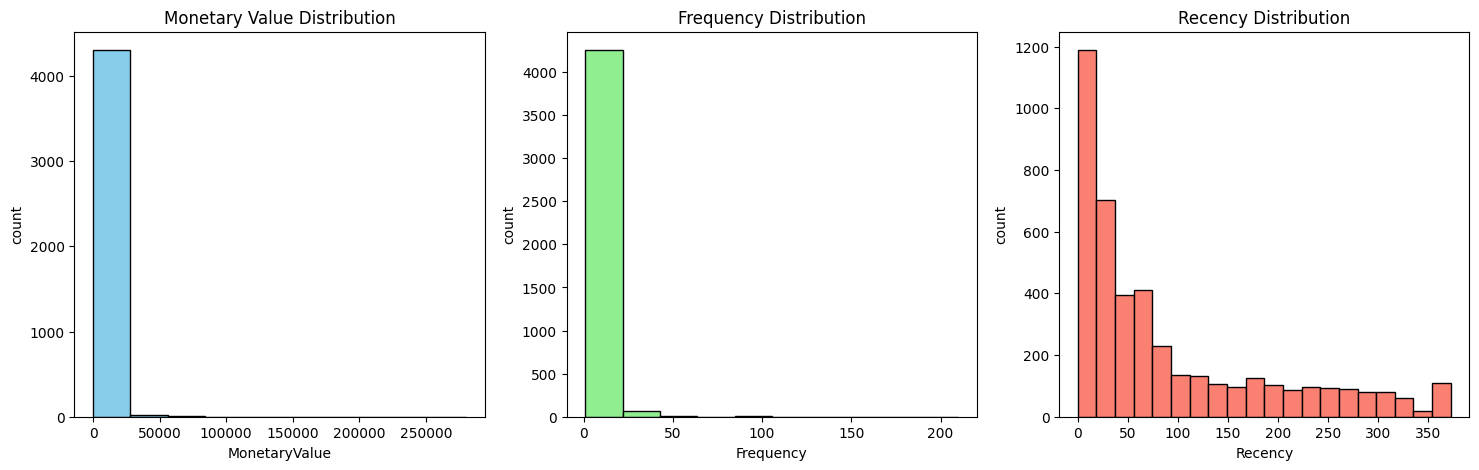

In [16]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
plt.hist(agg_data['MonetaryValue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
plt.hist(agg_data['Frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
plt.hist(agg_data['Recency'], bins = 20, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

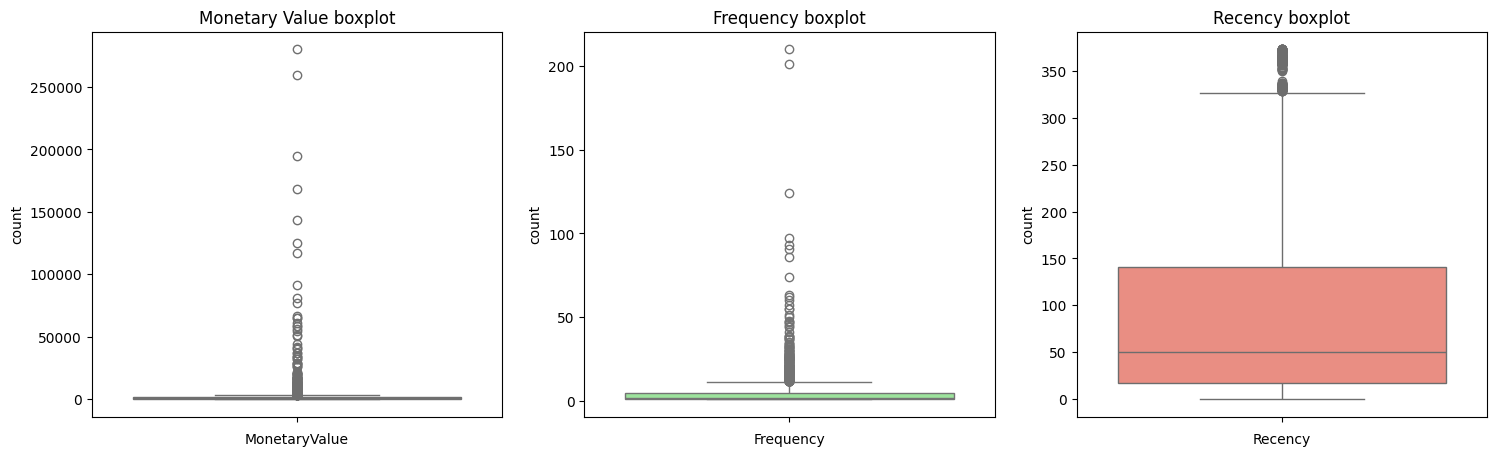

In [17]:
import seaborn as sns
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(agg_data['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.boxplot(agg_data['Frequency'], color = 'lightgreen')
plt.title('Frequency boxplot')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.boxplot(agg_data['Recency'], color = 'salmon')
plt.title('Recency boxplot')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

### Dealing with Outliers

In [18]:
# Dealing with Monetary Outlier
mon_q1 = agg_data['MonetaryValue'].quantile(0.25)
mon_q3 = agg_data['MonetaryValue'].quantile(0.75)

IQR = mon_q3 - mon_q1

monetary_outliers = agg_data[(agg_data['MonetaryValue'] > (mon_q3 + 1.5 * IQR))
    | (agg_data['MonetaryValue'] < (mon_q1 - 1.5 * IQR))].copy()

# Dealing with Frequency Outlier
freq_q1 = agg_data['Frequency'].quantile(0.25)
freq_q3 = agg_data['Frequency'].quantile(0.75)

IQR = freq_q3 - freq_q1

frequency_outliers = agg_data[(agg_data['Frequency'] > (freq_q3 + 1.5 * IQR))
    | (agg_data['Frequency'] < (freq_q1 - 1.5 * IQR))].copy()

# Dealing with Recency Outlier
rec_q1 = agg_data['Recency'].quantile(0.25)
rec_q3 = agg_data['Recency'].quantile(0.75)

IQR = rec_q3 - rec_q1

recency_outliers = agg_data[(agg_data['Recency'] > (rec_q3 + 1.5 * IQR))
    | (agg_data['Recency'] < (rec_q1 - 1.5 * IQR))].copy()

### Non-Outlier DataFrame

In [19]:
non_outliers = agg_data[(~agg_data.index.isin(monetary_outliers.index))
                            & (~agg_data.index.isin(frequency_outliers.index))]
non_outliers.head()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
2,12348.0,1797.24,4,2011-09-25 13:13:00,74
3,12349.0,1757.55,1,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309
5,12352.0,2506.04,8,2011-11-03 14:37:00,35
6,12353.0,89.00,1,2011-05-19 17:47:00,203


### Boxplot of non-outliers DataFrame

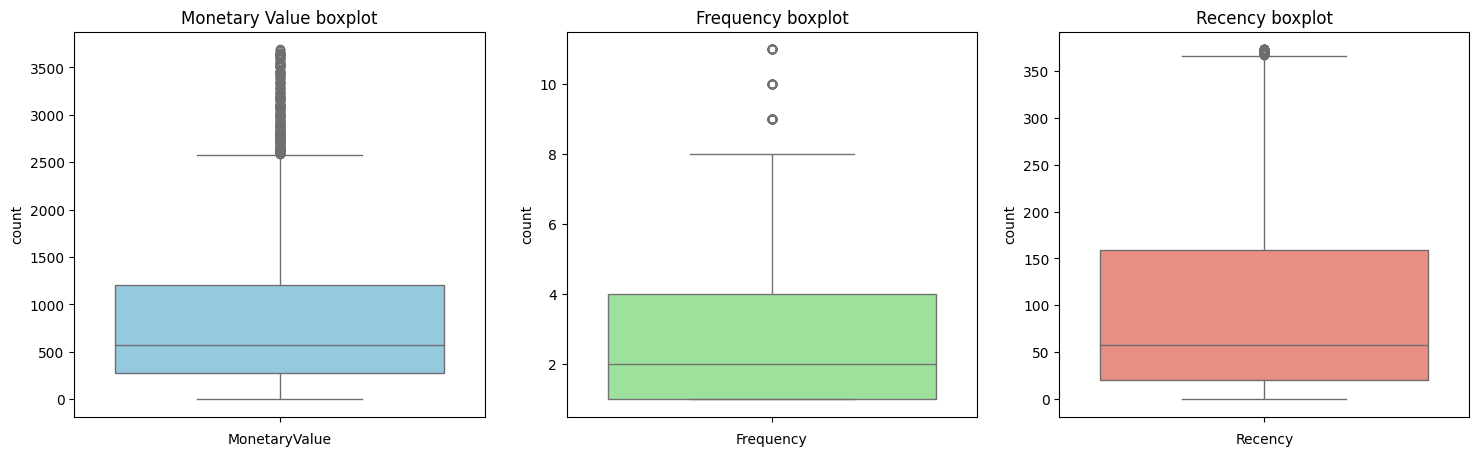

In [21]:
import seaborn as sns
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers['Frequency'], color = 'lightgreen')
plt.title('Frequency boxplot')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers['Recency'], color = 'salmon')
plt.title('Recency boxplot')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(),
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5,
                ax=ax)
    ax.set_title('Correlation Between RFM Metrics')

### 3-Dimensional Scatterplot for CustomerID

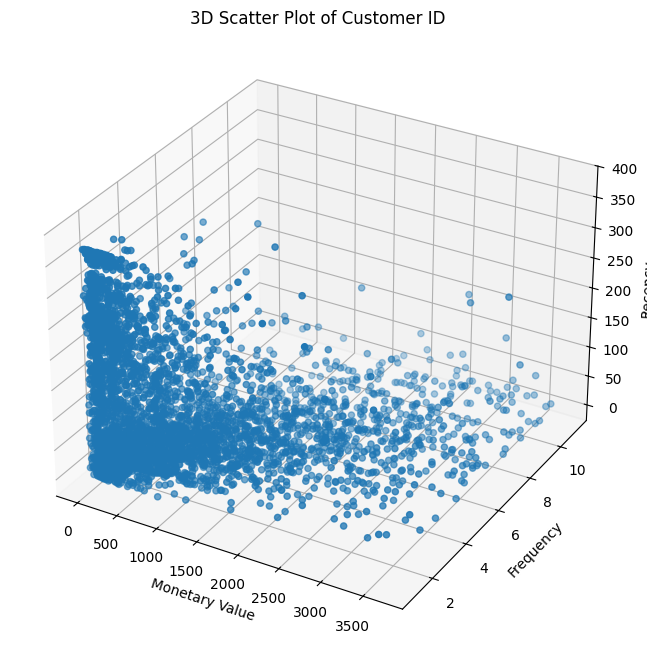

In [22]:
fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers['MonetaryValue'],non_outliers['Frequency'],non_outliers['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer ID')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rfm = ['MonetaryValue', 'Frequency', 'Recency']

non_outliers_scaled = scaler.fit_transform(non_outliers[rfm])
non_outliers_scaled = pd.DataFrame(non_outliers_scaled, index = non_outliers.index, columns = rfm)
non_outliers_scaled.head().round(2)

,MonetaryValue,Frequency,Recency
2,1.15,0.57,-0.25
3,1.11,-0.81,-0.80
4,-0.66,-0.81,2.06
5,2.03,2.40,-0.64
6,-0.96,-0.81,1.01


### 3-Dimensional Scatterplot for CustomerID After Scaled

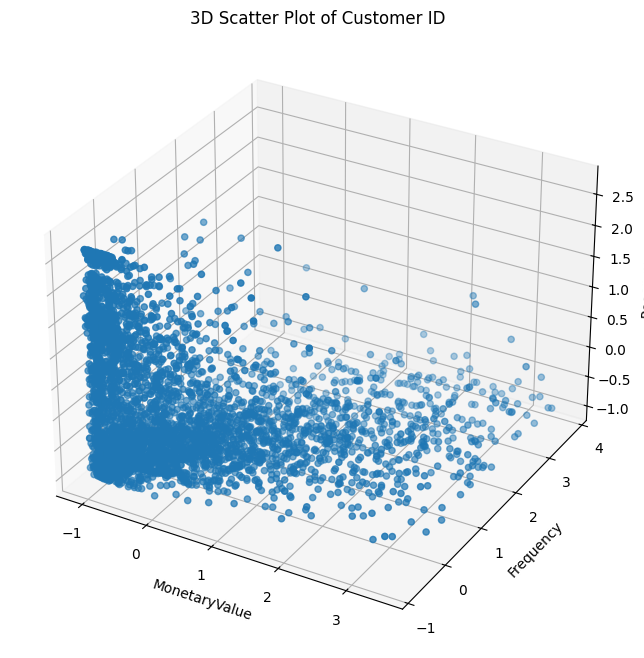

In [30]:
fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_scaled['MonetaryValue'], non_outliers_scaled['Frequency'], 
           non_outliers_scaled['Recency'])
ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer ID')
plt.show()

### Elbow Method To Determine The Number of K-Clusters

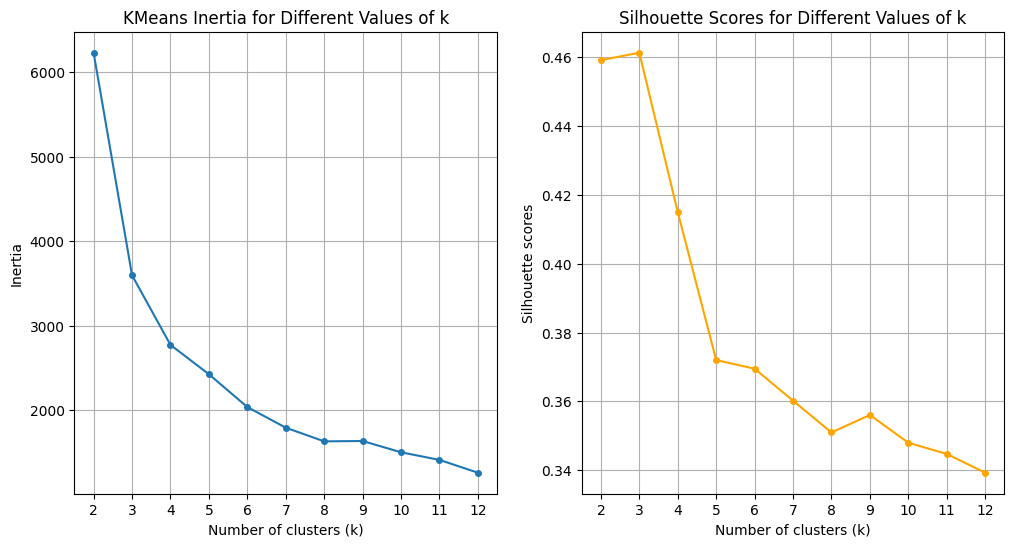

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming non_outliers_scaled is already defined
max_k = 12
inertia = []
silhouette_scores = []  # Create a list to store silhouette scores
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(non_outliers_scaled)
    
    # Calculate and store the silhouette score
    sil_score = silhouette_score(non_outliers_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Store inertia values
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(12, 6))

# Plot inertia
plt.subplot(1, 2, 1)  # Fix the subplot index
plt.plot(k_values, inertia, marker='o', markersize=4.0)
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', markersize=4.0, color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.xticks(k_values)
plt.grid(True)

plt.show()

### Cluster Labels

In [26]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(non_outliers_scaled)

cluster_labels

array([1, 1, 0, ..., 0, 2, 1], shape=(3865,), dtype=int32)

In [27]:
non_outliers['Cluster'] = cluster_labels
non_outliers.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_7140\1314222009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['Cluster'] = cluster_labels


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,1
3,12349.0,1757.55,1,2011-11-21 09:51:00,18,1
4,12350.0,334.40,1,2011-02-02 16:01:00,309,0
5,12352.0,2506.04,8,2011-11-03 14:37:00,35,3
6,12353.0,89.00,1,2011-05-19 17:47:00,203,0


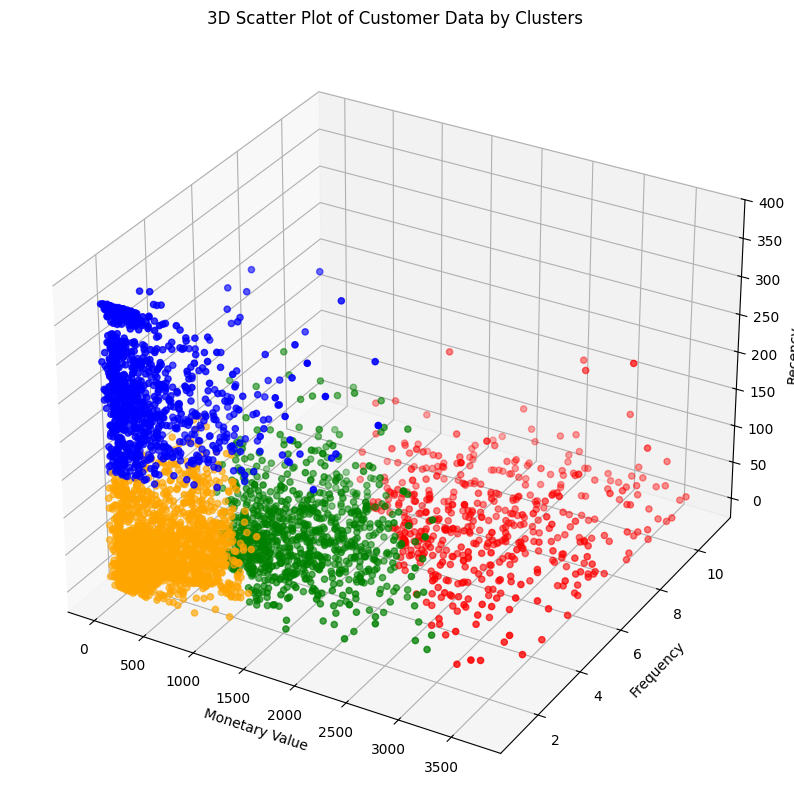

In [28]:
cluster_colors = {0 : 'blue', 1 : 'green', 2 : 'orange', 3 : 'red'}
colors = non_outliers['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers['MonetaryValue'],
                     non_outliers['Frequency'],
                     non_outliers['Recency'],
                    c = colors, marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Clusters')
plt.show()

### Violin Plot

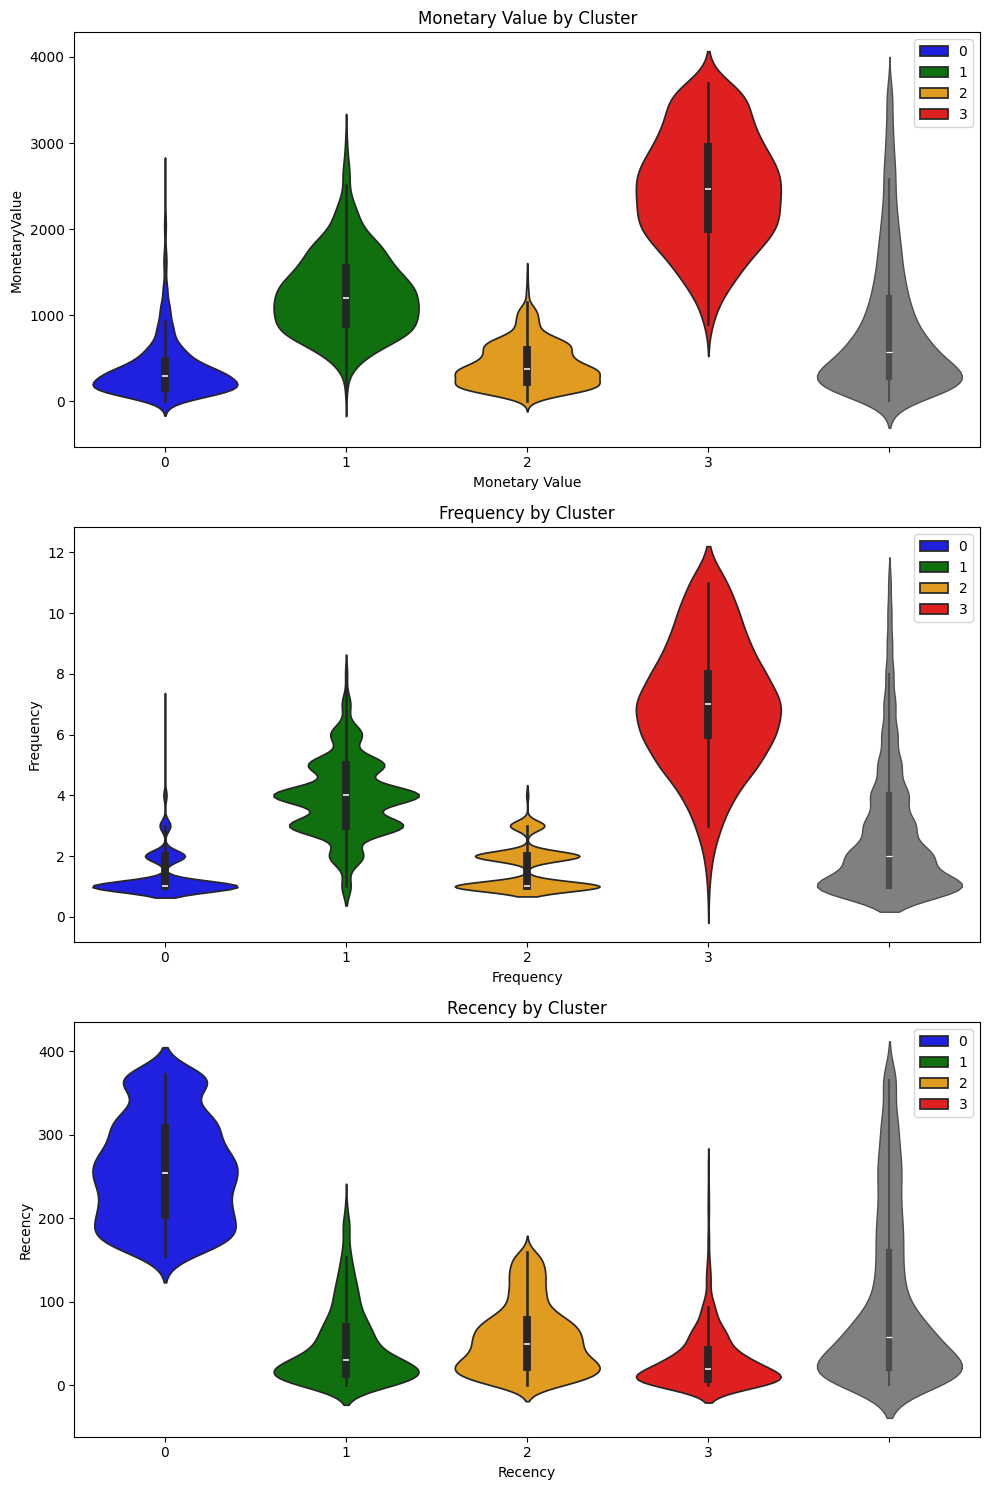

In [29]:
plt.figure(figsize = (10, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['MonetaryValue'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.xlabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Frequency'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Recency'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


### Interpretation of the Violin Plots
1. **Cluster 0 (Blue): "Retain"**

**Rationale:** This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
<br/>**Action:** Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. **Cluster 1 (Green): "Re-Engage"**

**Rationale:** This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
<br/>**Action:**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. **Cluster 2 (Orange): "Nurture"**

**Rationale:** This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
<br/>**Action:** Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. **Cluster 3 (Red): "Reward"**

**Rationale:** This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
<br/>**Action:** Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

_**<u>Summary of Cluster Name</u>**_  
- **Cluster 0 (Blue): "Retain"**
- **Cluster 1 (Green): "Re-Engage"**
- **Cluster 2 (Orange): "Nurture"**
- **Cluster 3 (Red): "Reward"**


### Indices appearing in both Monetary and Frequency Outliers

In [30]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters.head()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,5226.23,10,2011-12-06 15:40:00,2,-1


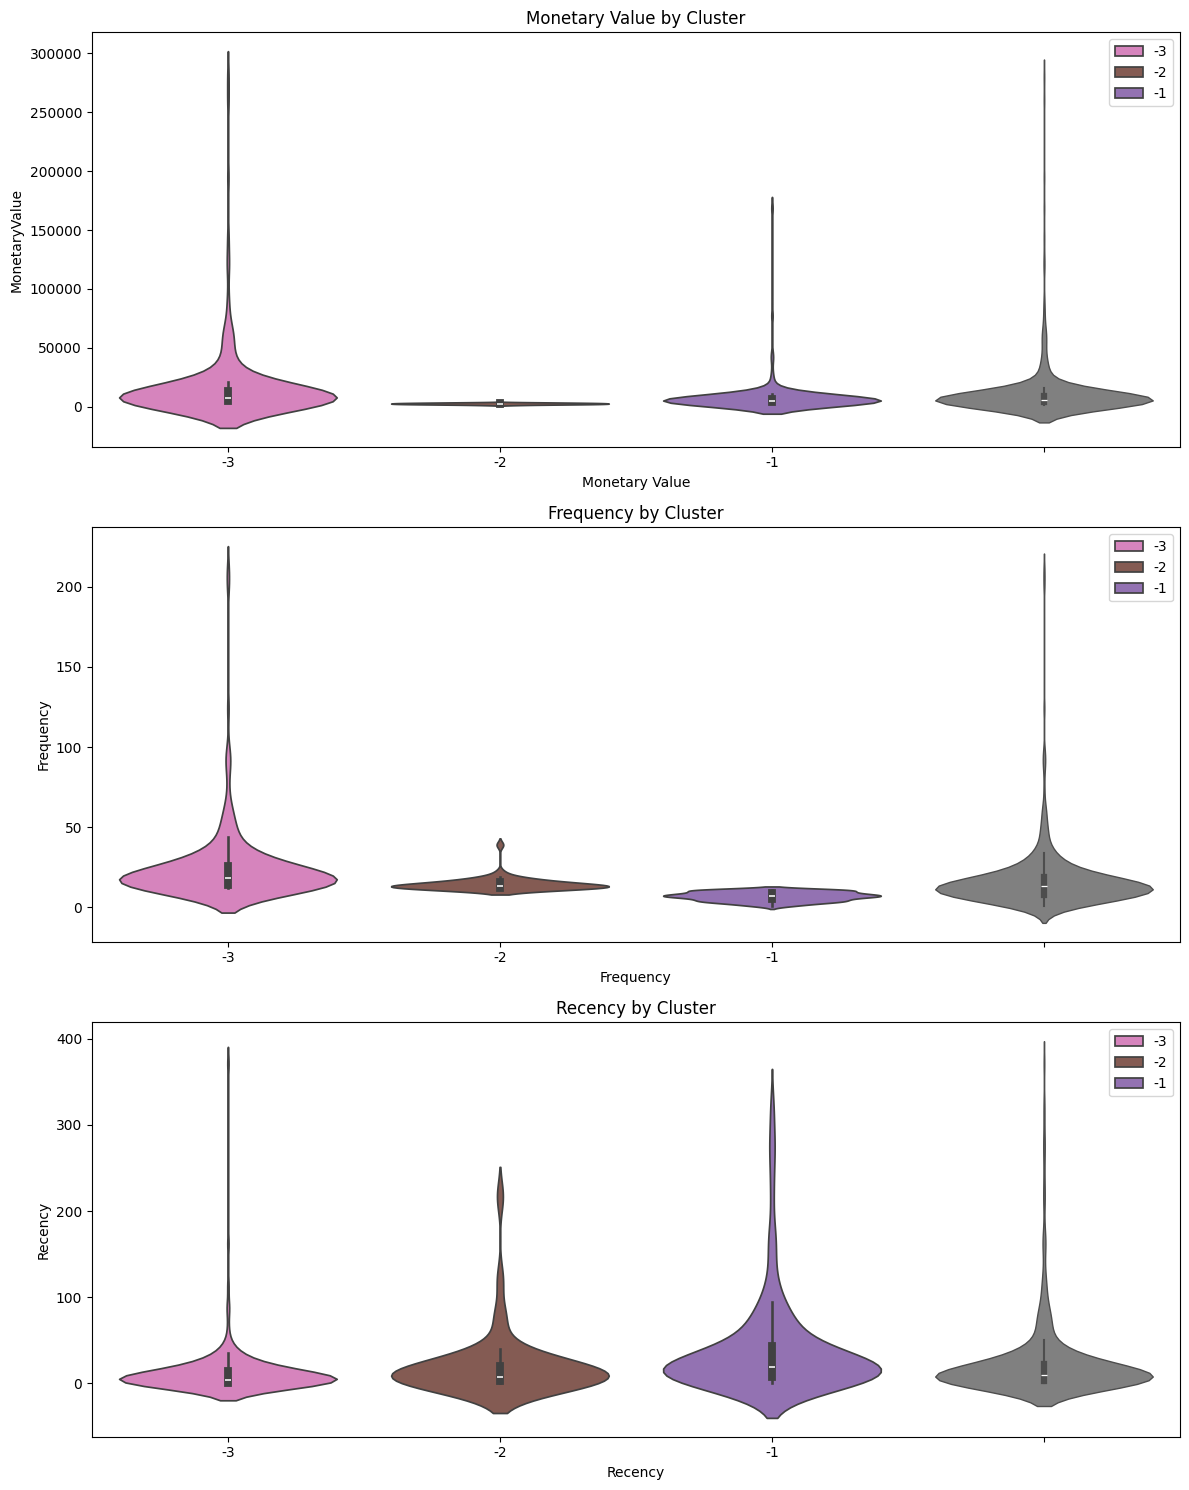

In [31]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'
                 }
        
plt.figure(figsize = (12, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['MonetaryValue'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.xlabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['Frequency'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['Recency'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


**Cluster - 1 (Monetary Outliers) PAMPER:**
<br/> __-__ Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
<br/> __-__ Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

**Cluster - 2 (Frequency Outliers) UPSELL:**
<br/> __-__ Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
<br/> __-__ Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

**Cluster - 3 (Monetary & Frequency Outliers) DELIGHT:**
<br/> __-__ Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
<br/> __-__ Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [32]:
cluster_labels = {0: 'RETAIN', 1: 'RE-ENGAGE', 2: 'NURTURE',
                  3: 'REWARD', -1: 'PAMPER', -2: 'UPSELL',
                  -3: 'DELIGHT'}

full_clustering = pd.concat([non_outliers, outlier_clusters])
full_clustering['ClusterLabel'] = full_clustering['Cluster'].map(cluster_labels)
full_clustering

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,1,RE-ENGAGE
3,12349.0,1757.55,1,2011-11-21 09:51:00,18,1,RE-ENGAGE
4,12350.0,334.40,1,2011-02-02 16:01:00,309,0,RETAIN
5,12352.0,2506.04,8,2011-11-03 14:37:00,35,3,REWARD
6,12353.0,89.00,1,2011-05-19 17:47:00,203,0,RETAIN
...,...,...,...,...,...,...,...
4253,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4273,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4292,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4294,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


### Streamlit Dashboard

In [1]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import datetime as dt

# App Configuration
st.set_page_config(page_title="Comprehensive Customer Segmentation", layout="wide")
st.title("🎯 Comprehensive Customer Segmentation Dashboard")

# =============================================
# Data Processing Functions
# =============================================
def load_data(file):
    if file.name.endswith('csv'):
        data = pd.read_csv(file)
    else:
        data = pd.read_excel(file)
    if 'CustomerID' not in data or 'InvoiceDate' not in data:
        st.error("Dataset missing required columns (CustomerID or InvoiceDate)")
        st.stop()
    data = data[data['CustomerID'].notna()]
    data = data[data['Quantity'] > 0]
    data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
    data = data[data['TotalAmount'] > 0]
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    return data

# RFM Calculation
def calculate_rfm(data):
    snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalAmount': 'sum'
    }).reset_index()
    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    rfm['CLV'] = rfm['Frequency'] * rfm['Monetary'] * 0.3
    return rfm

# Radar chart
def plot_radar_chart(cluster_means):
    metrics = ['Recency', 'Frequency', 'Monetary']
    for metric in metrics:
        cluster_means[f'{metric}_norm'] = (
            (cluster_means[metric] - cluster_means[metric].min()) /
            (cluster_means[metric].max() - cluster_means[metric].min())
        )
    melted = cluster_means.melt(
        id_vars='Cluster', 
        value_vars=[f'{m}_norm' for m in metrics],
        var_name='Metric', 
        value_name='Value'
    )
    melted['Metric'] = melted['Metric'].str.replace('_norm', '')
    fig = px.line_polar(
        melted, 
        r='Value', 
        theta='Metric', 
        color='Cluster',
        line_close=True,
        template='plotly_dark',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])))
    return fig

# Elbow Method
def plot_elbow_method(data, max_clusters=10):
    wcss = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(range(2, max_clusters+1), wcss, marker='o')
    ax.set_title('Elbow Method for Optimal k')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Within-Cluster Sum of Squares')
    return fig

# Cluster Profiling
def create_cluster_profiles(rfm):
    profiles = rfm.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'Count'}).reset_index()
    profiles['Revenue'] = rfm.groupby('Cluster')['Monetary'].sum().values
    profiles['SegmentName'] = profiles['Cluster'].apply(lambda x: f'Segment {x}')
    profiles['Strategy'] = "Custom strategy for this segment"
    return profiles

# =============================================
# Dashboard Layout
# =============================================
st.sidebar.header("Data Upload")
uploaded_file = st.sidebar.file_uploader("Upload transaction data", type=["csv", "xlsx"])

if uploaded_file:
    with st.spinner('Processing data...'):
        data = load_data(uploaded_file)
        rfm = calculate_rfm(data)

        k = st.sidebar.slider("Number of Clusters", 2, 10, 4)
        use_tsne = st.sidebar.checkbox("Use t-SNE", False)
        scaler = StandardScaler()
        rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

        kmeans = KMeans(n_clusters=k, random_state=42)
        rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
        silhouette = silhouette_score(rfm_scaled, kmeans.labels_)

        reducer = TSNE(n_components=2, perplexity=30) if use_tsne else PCA(n_components=2)
        reduced_data = reducer.fit_transform(rfm_scaled)
        rfm['Dim1'], rfm['Dim2'] = reduced_data[:, 0], reduced_data[:, 1]

        cluster_means = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
        profiles = create_cluster_profiles(rfm)

    # Main Layout
    tab1, tab2, tab3 = st.tabs(["Overview", "Cluster Analysis", "Strategies"])

    with tab1:
        col1, col2, col3 = st.columns(3)
        col1.metric("Customers", rfm.shape[0])
        col2.metric("Revenue", f"${rfm.Monetary.sum()/1000:.1f}K")
        col3.metric("Quality Score", f"{silhouette:.2f}")

        fig = px.histogram(rfm, x='Recency', nbins=30, title='Recency Distribution')
        st.plotly_chart(fig, use_container_width=True)

        fig = px.scatter(rfm, x='Frequency', y='Monetary', color='Cluster', log_x=True, log_y=True)
        st.plotly_chart(fig, use_container_width=True)

    with tab2:
        st.plotly_chart(plot_radar_chart(cluster_means), use_container_width=True)

        fig = px.scatter(rfm, x='Dim1', y='Dim2', color='Cluster', hover_data=['Recency','Frequency','Monetary'],
                         title="Cluster Projection")
        st.plotly_chart(fig, use_container_width=True)

        st.subheader("Cluster Statistics")
        st.dataframe(profiles)

        st.subheader("Elbow Method")
        st.pyplot(plot_elbow_method(rfm_scaled))

    with tab3:
        selected_cluster = st.selectbox("Select Cluster", sorted(rfm.Cluster.unique()))
        cluster_profile = profiles[profiles.Cluster == selected_cluster].iloc[0]
        col1, col2 = st.columns(2)
        col1.markdown(f"### {cluster_profile.SegmentName}")
        col1.write(f"**Customers:** {cluster_profile.Count}")
        col1.write(f"**Recency:** {cluster_profile.Recency:.0f} days")
        col1.write(f"**Spend:** ${cluster_profile.Monetary:.0f}")
        col1.write(f"**Strategy:** {cluster_profile.Strategy}")

        fig = px.box(rfm[rfm.Cluster == selected_cluster], y=['Recency', 'Frequency', 'Monetary'],
                     title="Cluster Distribution")
        col2.plotly_chart(fig, use_container_width=True)

    # Heatmap of RFM correlations
    st.subheader("RFM Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(),
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5,
                ax=ax)
    ax.set_title('Correlation Between RFM Metrics')
    st.pyplot(fig)

    st.sidebar.download_button(
        label="📥 Download Segmented Data",
        data=rfm.to_csv(index=False),
        file_name="customer_segments.csv",
        mime="text/csv"
    )

else:
    st.info("👋 Upload a transaction dataset to begin analysis")
    st.image("https://images.unsplash.com/photo-1551288049-bebda4e38f71", width=600)


Overwriting dashboard.py
